# **Importing Modules and Libraries**

In [2]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle 
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout
from keras.utils import to_categorical

# **Importing Datasets**

In [3]:
#data = pd.read_csv('/content/drive/MyDrive/IoT_ML_Dataset/UNSW/UNSW_NB15.csv')
data = pd.read_csv('./UNSW_NB15.csv')

In [4]:
data.head(n=5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [6]:
columns_to_keep = [0, 2, 4, 7, 8, 9, 10, 15, 16, 43, 44]
data = data.iloc[:, columns_to_keep]

In [7]:
# data[data['service']=='-']

In [8]:
# data['service'].replace('-',np.nan,inplace=True)

In [9]:
data.isnull().sum()

id            0
proto         0
state         0
sbytes        0
dbytes        0
rate          0
sttl          0
dloss         0
sinpkt        0
attack_cat    0
label         0
dtype: int64

In [10]:
data.shape

(175341, 11)

In [11]:
data.dropna(inplace=True)

In [12]:
data.shape

(175341, 11)

In [13]:
data['attack_cat'].value_counts()

attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64

In [14]:
data['state'].value_counts()

state
INT    82275
FIN    77825
CON    13152
REQ     1991
RST       83
ECO       12
PAR        1
URN        1
no         1
Name: count, dtype: int64

In [15]:
data

,id,proto,state,sbytes,dbytes,rate,sttl,dloss,sinpkt,attack_cat,label
0,1,tcp,FIN,258,172,74.087490,252,0,24.295600,Normal,0
1,2,tcp,FIN,734,42014,78.473372,62,17,49.915000,Normal,0
2,3,tcp,FIN,364,13186,14.170161,62,6,231.875571,Normal,0
3,4,tcp,FIN,628,770,13.677108,62,3,152.876547,Normal,0
4,5,tcp,FIN,534,268,33.373826,254,1,47.750333,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,udp,INT,114,0,111111.107200,254,0,0.009000,Generic,1
175337,175338,tcp,FIN,620,354,33.612649,254,1,54.400111,Shellcode,1
175338,175339,udp,INT,114,0,111111.107200,254,0,0.009000,Generic,1
175339,175340,udp,INT,114,0,111111.107200,254,0,0.009000,Generic,1


In [16]:
#features = pd.read_csv('/content/drive/MyDrive/IoT_ML_Dataset/UNSW/UNSW_NB15_features.csv')
features = pd.read_csv('./UNSW_NB15_features.csv')

In [17]:
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [18]:
features['Type '] = features['Type '].str.lower()

In [19]:
# selecting column names of all data types
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [20]:
# selecting common column names from dataset and feature dataset
cols = data.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

In [21]:
# Converting integer columns to numeric
for c in integer_names:
  pd.to_numeric(data[c])

In [22]:
# Converting binary columns to numeric
for c in binary_names:
  pd.to_numeric(data[c])

In [23]:
# Converting float columns to numeric
for c in float_names:
  pd.to_numeric(data[c])

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          175341 non-null  int64  
 1   proto       175341 non-null  object 
 2   state       175341 non-null  object 
 3   sbytes      175341 non-null  int64  
 4   dbytes      175341 non-null  int64  
 5   rate        175341 non-null  float64
 6   sttl        175341 non-null  int64  
 7   dloss       175341 non-null  int64  
 8   sinpkt      175341 non-null  float64
 9   attack_cat  175341 non-null  object 
 10  label       175341 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 14.7+ MB


In [25]:
data

,id,proto,state,sbytes,dbytes,rate,sttl,dloss,sinpkt,attack_cat,label
0,1,tcp,FIN,258,172,74.087490,252,0,24.295600,Normal,0
1,2,tcp,FIN,734,42014,78.473372,62,17,49.915000,Normal,0
2,3,tcp,FIN,364,13186,14.170161,62,6,231.875571,Normal,0
3,4,tcp,FIN,628,770,13.677108,62,3,152.876547,Normal,0
4,5,tcp,FIN,534,268,33.373826,254,1,47.750333,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,udp,INT,114,0,111111.107200,254,0,0.009000,Generic,1
175337,175338,tcp,FIN,620,354,33.612649,254,1,54.400111,Shellcode,1
175338,175339,udp,INT,114,0,111111.107200,254,0,0.009000,Generic,1
175339,175340,udp,INT,114,0,111111.107200,254,0,0.009000,Generic,1


# **Data Visualization**

## **Binary Classification**

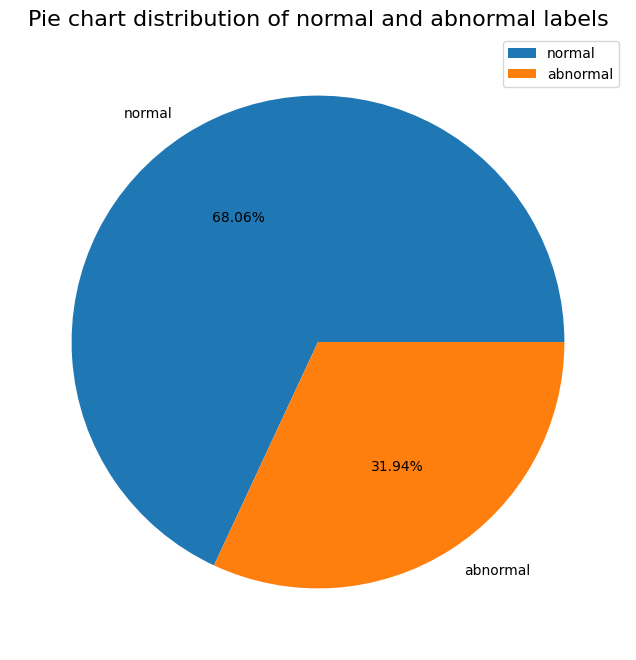

In [26]:
plt.figure(figsize=(8,8))
plt.pie(data.label.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
# plt.savefig('plots/Pie_chart_binary.png')
plt.show()

## **Multi-class Classification**

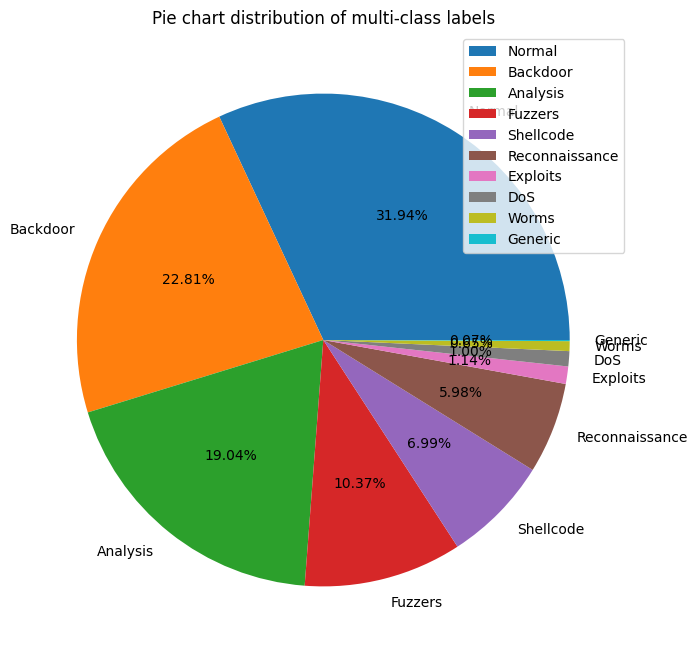

In [27]:
plt.figure(figsize=(8,8))
plt.pie(data.attack_cat.value_counts(),labels=data.attack_cat.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
# plt.savefig('plots/Pie_chart_multi.png')
plt.show()

# **One hot encoding**

In [28]:
num_col = data.select_dtypes(include='number').columns

# selecting categorical data attributes
cat_col = data.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['proto', 'state'], dtype='object')

In [29]:
# creating a dataframe with only categorical attributes
data_cat = data[cat_col].copy()
data_cat.head()

,proto,state
0,tcp,FIN
1,tcp,FIN
2,tcp,FIN
3,tcp,FIN
4,tcp,FIN


In [30]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [31]:
data_cat.head()

,proto_3pc,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,...,proto_zero,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [32]:
data.shape

(175341, 11)

In [33]:
data = pd.concat([data, data_cat],axis=1)

In [34]:
data.shape

(175341, 153)

In [35]:
data.drop(columns=cat_col,inplace=True)

In [36]:
data.shape

(175341, 151)

# **Data Normalization**


In [37]:
# selecting numeric attributes columns from data
num_col = list(data.select_dtypes(include='number').columns)
num_col.remove('id')
num_col.remove('label')
print(num_col)

['sbytes', 'dbytes', 'rate', 'sttl', 'dloss', 'sinpkt']


In [38]:
# using minmax scaler for normalizing data
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [39]:
# data before normalization
data.head()

,id,sbytes,dbytes,rate,sttl,dloss,sinpkt,attack_cat,label,proto_3pc,...,proto_zero,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,1,258,172,74.087490,252,0,24.295600,Normal,0,False,...,False,False,False,True,False,False,False,False,False,False
1,2,734,42014,78.473372,62,17,49.915000,Normal,0,False,...,False,False,False,True,False,False,False,False,False,False
2,3,364,13186,14.170161,62,6,231.875571,Normal,0,False,...,False,False,False,True,False,False,False,False,False,False
3,4,628,770,13.677108,62,3,152.876547,Normal,0,False,...,False,False,False,True,False,False,False,False,False,False
4,5,534,268,33.373826,254,1,47.750333,Normal,0,False,...,False,False,False,True,False,False,False,False,False,False


In [40]:
# calling normalization() function
data = normalization(data.copy(),num_col)

In [41]:
# data after normalization
data.head()

,id,sbytes,dbytes,rate,sttl,dloss,sinpkt,attack_cat,label,proto_3pc,...,proto_zero,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,1,0.000018,0.000012,0.000074,0.988235,0.000000,0.000288,Normal,0,False,...,False,False,False,True,False,False,False,False,False,False
1,2,0.000054,0.002867,0.000078,0.243137,0.003100,0.000592,Normal,0,False,...,False,False,False,True,False,False,False,False,False,False
2,3,0.000026,0.000900,0.000014,0.243137,0.001094,0.002748,Normal,0,False,...,False,False,False,True,False,False,False,False,False,False
3,4,0.000046,0.000053,0.000014,0.243137,0.000547,0.001812,Normal,0,False,...,False,False,False,True,False,False,False,False,False,False
4,5,0.000039,0.000018,0.000033,0.996078,0.000182,0.000566,Normal,0,False,...,False,False,False,True,False,False,False,False,False,False


# **Label Encoding**

## **Multi-class Labels**

In [42]:
# one-hot-encoding attack label
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.attack_cat)

In [43]:
multi_data = pd.get_dummies(multi_data,columns=['attack_cat'])

In [44]:
# label encoding (0,1,2,3,4,5,6,7,8) multi-class labels
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['label'] = enc_label

In [45]:
le2.classes_

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode', 'Worms'], dtype=object)

In [46]:
# np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

### **Saving Prepared Dataset to Disk**

In [53]:
# multi_data.to_csv('./datasets/multi_data.csv')

# **MULTI-CLASS CLASSIFICATION**

## **Data Splitting**

In [54]:
X = multi_data.drop(columns=['label'],axis=1)
Y = multi_data['label']

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30, random_state=100)

## **Multi Layer Perceptron**

In [56]:
mlp_multi = MLPClassifier(random_state=123, solver='adam', max_iter=8000)
mlp_multi.fit(X_train,y_train)

MLPClassifier(max_iter=8000, random_state=123)

In [57]:
y_pred = mlp_multi.predict(X_test)

In [58]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.004467425812216034
Mean Squared Error -  0.018953291637359086
Root Mean Squared Error -  0.13767095422549772
R2 Score -  99.23181959232863
Accuracy -  99.87453187080585


In [59]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       1.00      0.98      0.99       618
      Backdoor       1.00      0.99      1.00       508
           DoS       1.00      1.00      1.00      3710
      Exploits       1.00      1.00      1.00      9998
       Fuzzers       1.00      1.00      1.00      5439
       Generic       1.00      1.00      1.00     11917
        Normal       1.00      1.00      1.00     16873
Reconnaissance       1.00      1.00      1.00      3169
     Shellcode       1.00      0.95      0.97       341
         Worms       0.00      0.00      0.00        30

      accuracy                           1.00     52603
     macro avg       0.90      0.89      0.90     52603
  weighted avg       1.00      1.00      1.00     52603



c:\Users\hhi20\anaconda3\envs\IDS\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hhi20\anaconda3\envs\IDS\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hhi20\anaconda3\envs\IDS\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Real and Predicted Data**

In [60]:
mlp_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# mlp_multi_df.to_csv('./predictions/mlp_real_pred_multi.csv')
mlp_multi_df

,Actual,Predicted
123407,3,3
97519,4,4
161738,5,5
141529,5,5
60722,3,3
...,...,...
139187,5,5
18472,6,6
24725,6,6
148504,5,5


### **Plot between Real and Predicted Data**

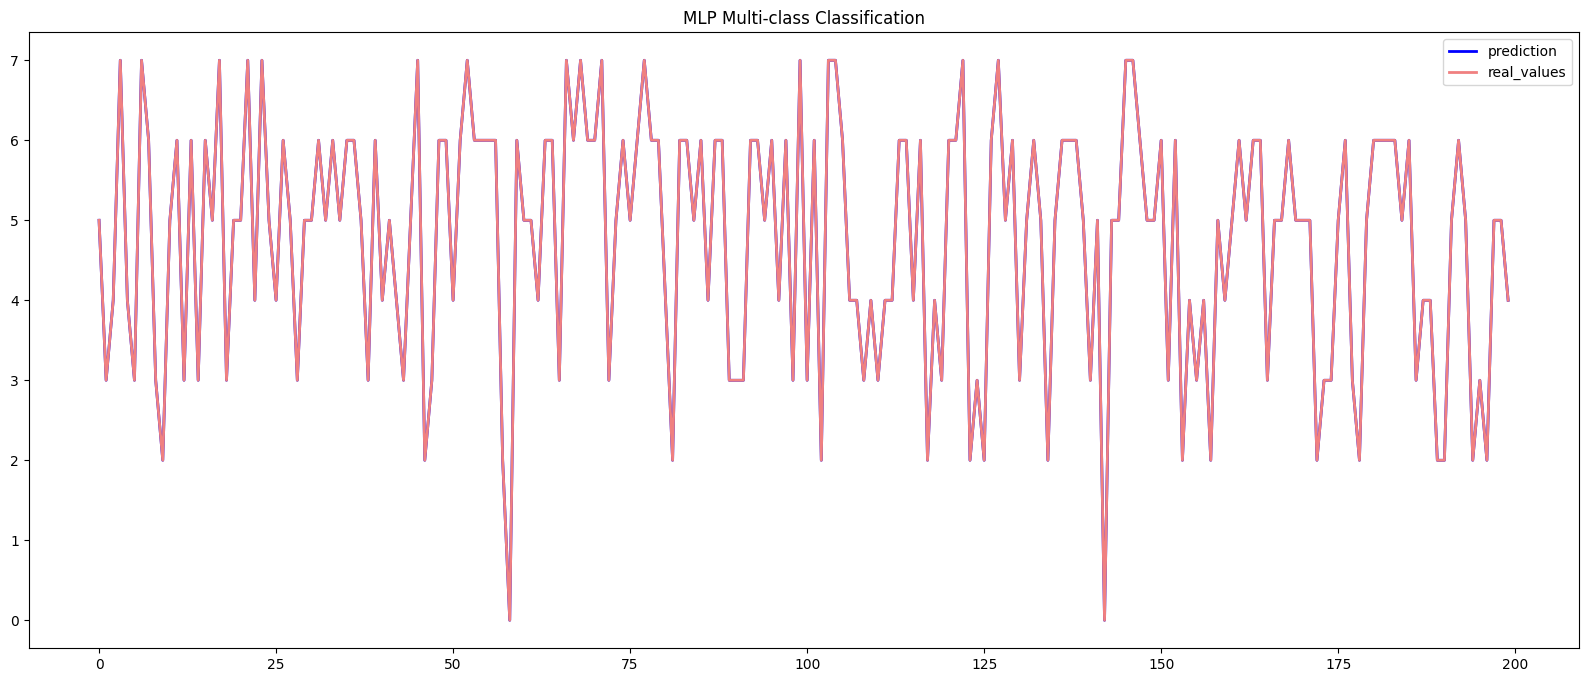

In [61]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[100:300], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[100:300].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("MLP Multi-class Classification")
# plt.savefig('plots/mlp_real_pred_multi.png')
plt.show()

### **Saving Trained Model to Disk**

In [62]:
pkl_filename = "./model/mlp_unsw.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(mlp_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved
